# <center> <span style="color:lightblue">K-mean Cluster</span>

In [2]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


In [3]:
X,y = make_blobs(n_samples=500,n_features=2,centers=4,cluster_std=1,center_box=(-10.0,10.0),shuffle=True,random_state=1)

range_n_clusters=[2,3,4,5,6]

In [21]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


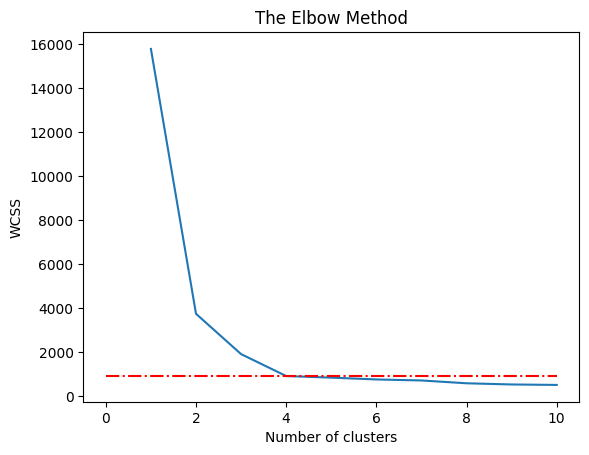

In [20]:
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.hlines(y=wcss[3], xmin=0, xmax=10, color='r',linestyles="dashdot")
plt.show()

In [7]:
clusterer=KMeans(n_clusters=4,random_state=10)
cluster_labels=clusterer.fit_predict(X)
print(cluster_labels)

[3 3 0 1 2 1 2 2 2 2 3 3 2 1 2 3 2 3 1 2 0 0 2 1 2 2 1 1 0 2 3 1 2 3 2 3 0
 0 3 0 2 0 1 2 2 3 0 2 1 1 1 0 0 2 3 0 0 0 0 2 1 1 0 2 1 2 3 2 0 0 3 0 2 3
 2 2 3 2 2 0 1 1 0 1 1 0 0 1 0 0 1 3 0 2 1 3 3 2 3 1 1 3 1 0 1 2 2 1 1 0 2
 3 1 0 1 0 1 2 1 2 0 3 3 0 2 0 1 3 3 2 1 0 0 0 0 3 1 2 1 1 2 3 2 1 1 1 2 2
 3 3 0 0 1 3 1 0 0 0 0 0 0 0 0 0 1 3 3 3 2 1 3 0 2 3 1 0 0 0 0 3 2 0 1 3 3
 0 2 3 3 2 1 1 3 3 2 1 2 3 3 1 3 0 1 2 2 3 2 0 3 2 0 2 0 3 2 2 2 1 0 1 2 3
 0 2 0 0 0 1 0 1 3 0 3 0 1 1 0 3 1 3 2 0 3 3 3 3 2 0 3 0 2 1 1 2 2 1 0 2 0
 1 2 1 0 0 1 2 3 3 0 0 0 2 1 1 2 1 0 3 1 3 1 3 3 1 3 1 1 2 0 0 0 2 2 0 3 1
 3 3 3 2 0 2 3 0 3 3 0 3 3 0 1 3 2 2 1 1 0 3 1 1 2 3 1 1 2 0 1 0 2 3 3 1 0
 3 2 1 1 2 2 2 3 2 1 1 0 1 1 1 1 3 3 2 1 0 2 3 1 0 1 2 1 0 2 0 1 2 2 3 1 3
 3 3 3 3 3 0 3 1 3 1 1 0 1 2 0 0 3 1 0 1 2 3 0 0 3 0 0 1 1 3 0 2 1 2 2 3 3
 2 3 0 0 3 0 3 0 1 3 1 0 2 1 0 2 1 3 2 1 1 0 2 0 2 3 1 3 2 1 3 3 3 0 1 2 3
 2 2 0 0 3 2 2 2 2 2 2 3 2 0 3 2 1 2 1 2 0 0 1 1 1 0 2 0 3 0 1 2 3 1 3 1 3
 2 1 1 3 0 2 3 0 0 0 3 2 

For n_clusters = 2 The average silhouette is : 0.7049787496083262


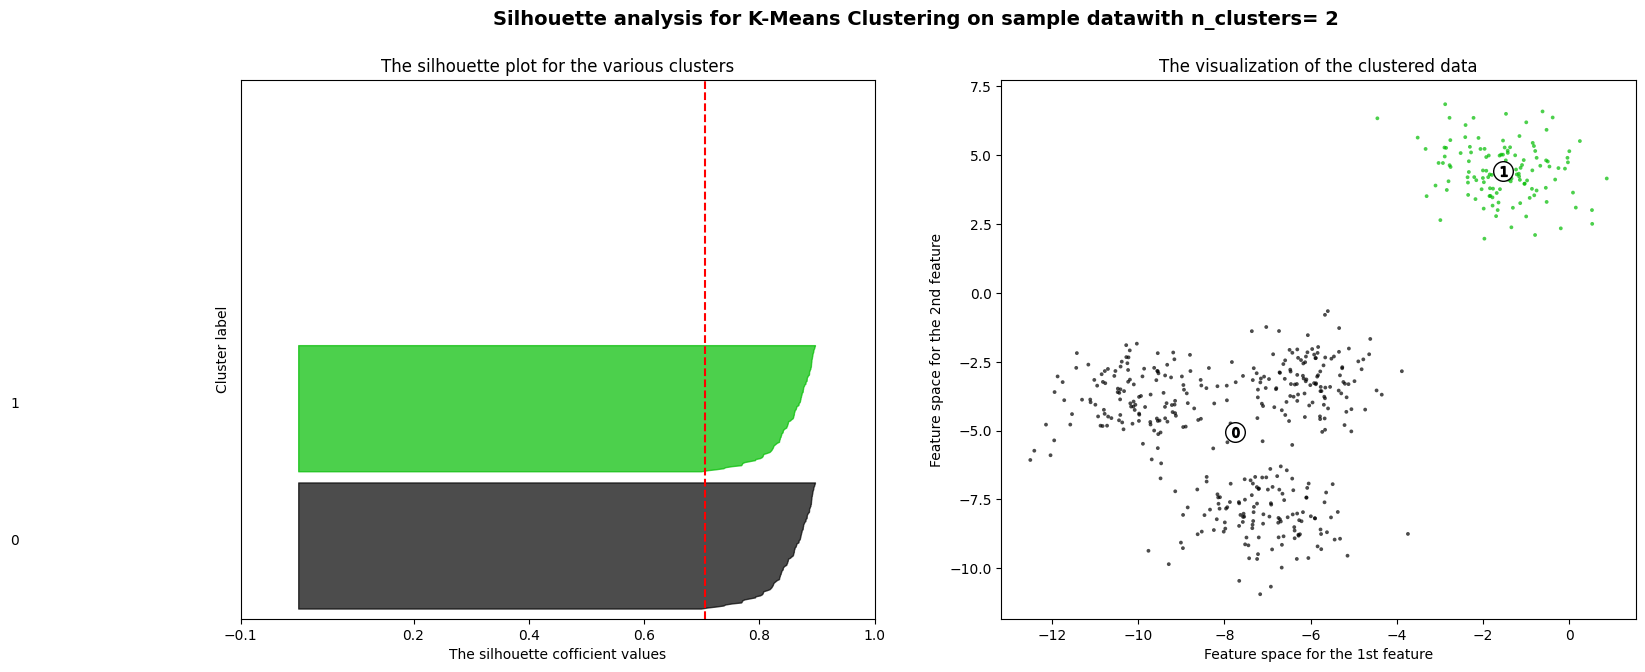

For n_clusters = 3 The average silhouette is : 0.5882004012129721


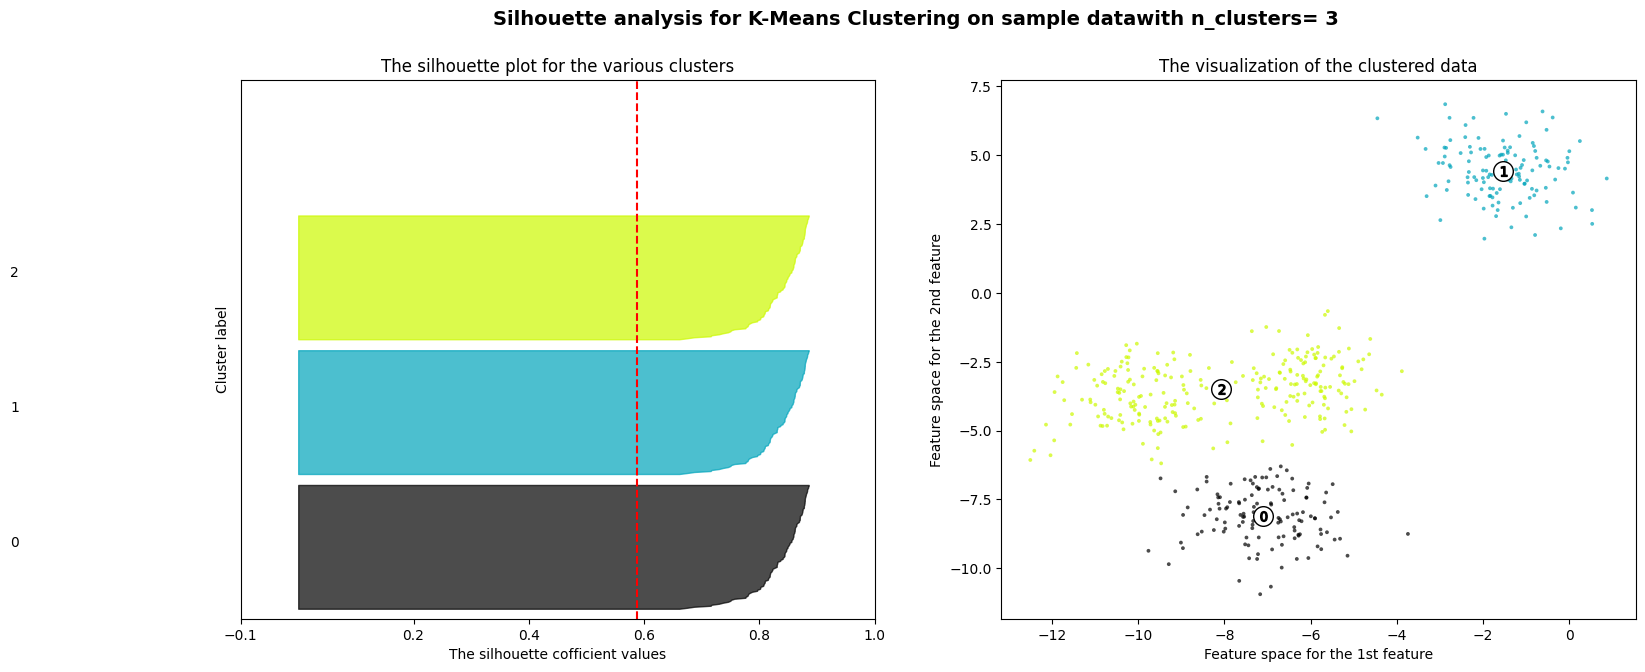

For n_clusters = 4 The average silhouette is : 0.6505186632729437


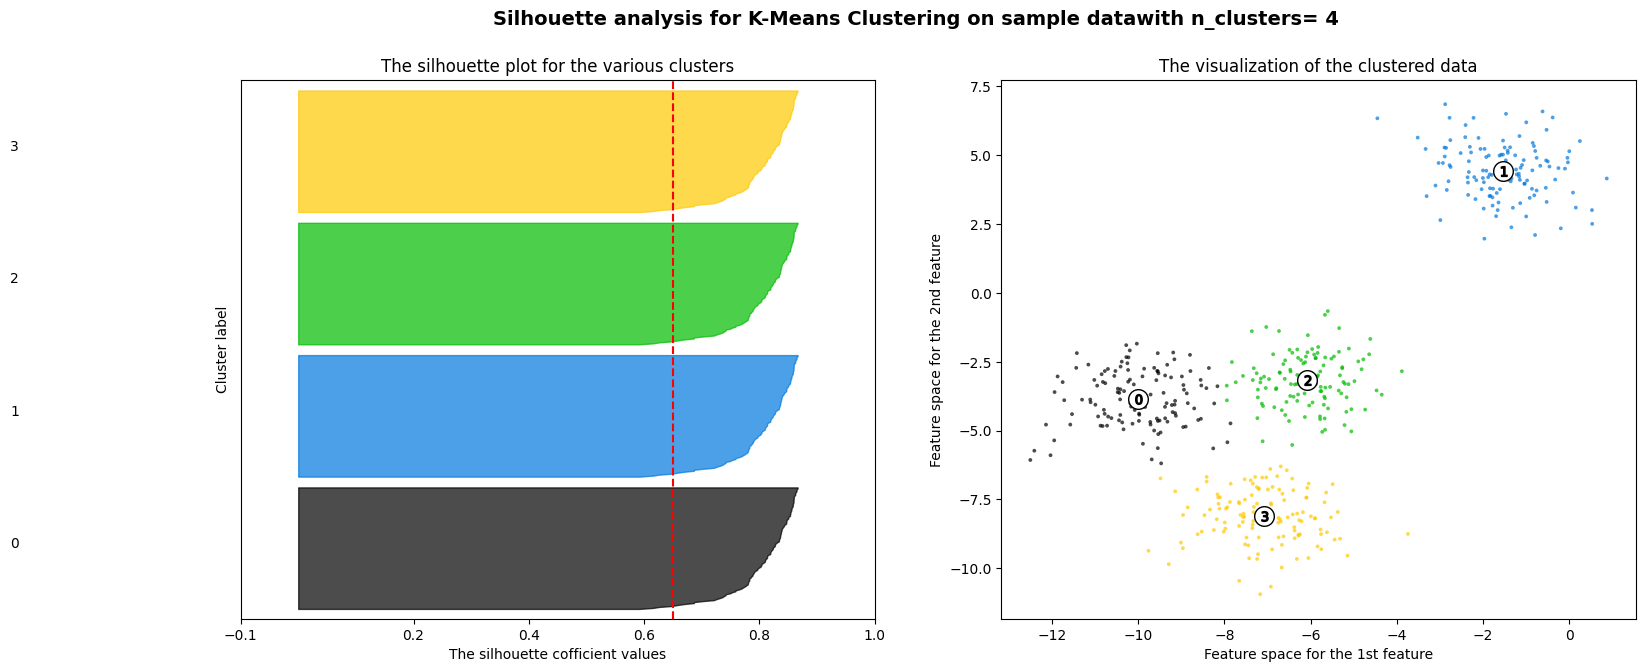

For n_clusters = 5 The average silhouette is : 0.561464362648773


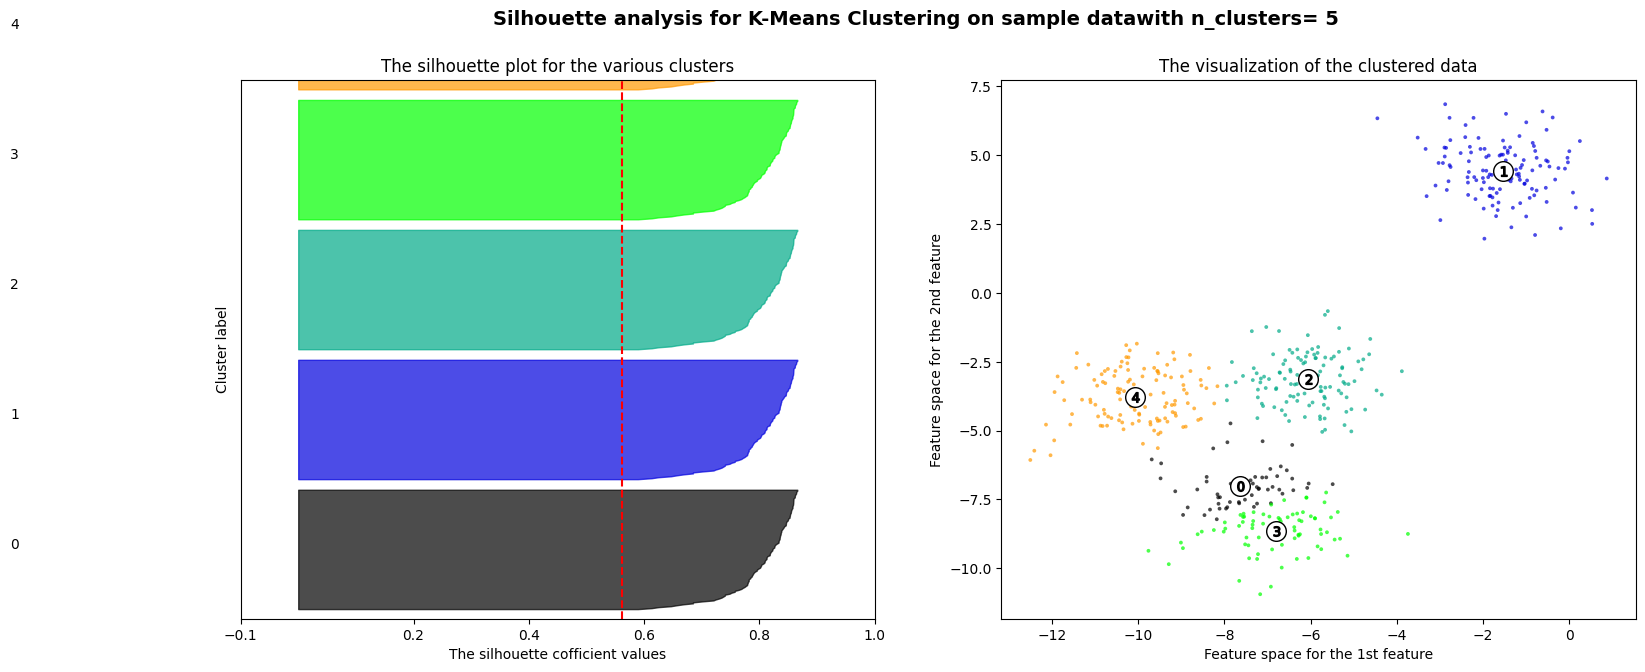

For n_clusters = 6 The average silhouette is : 0.4857596147013469


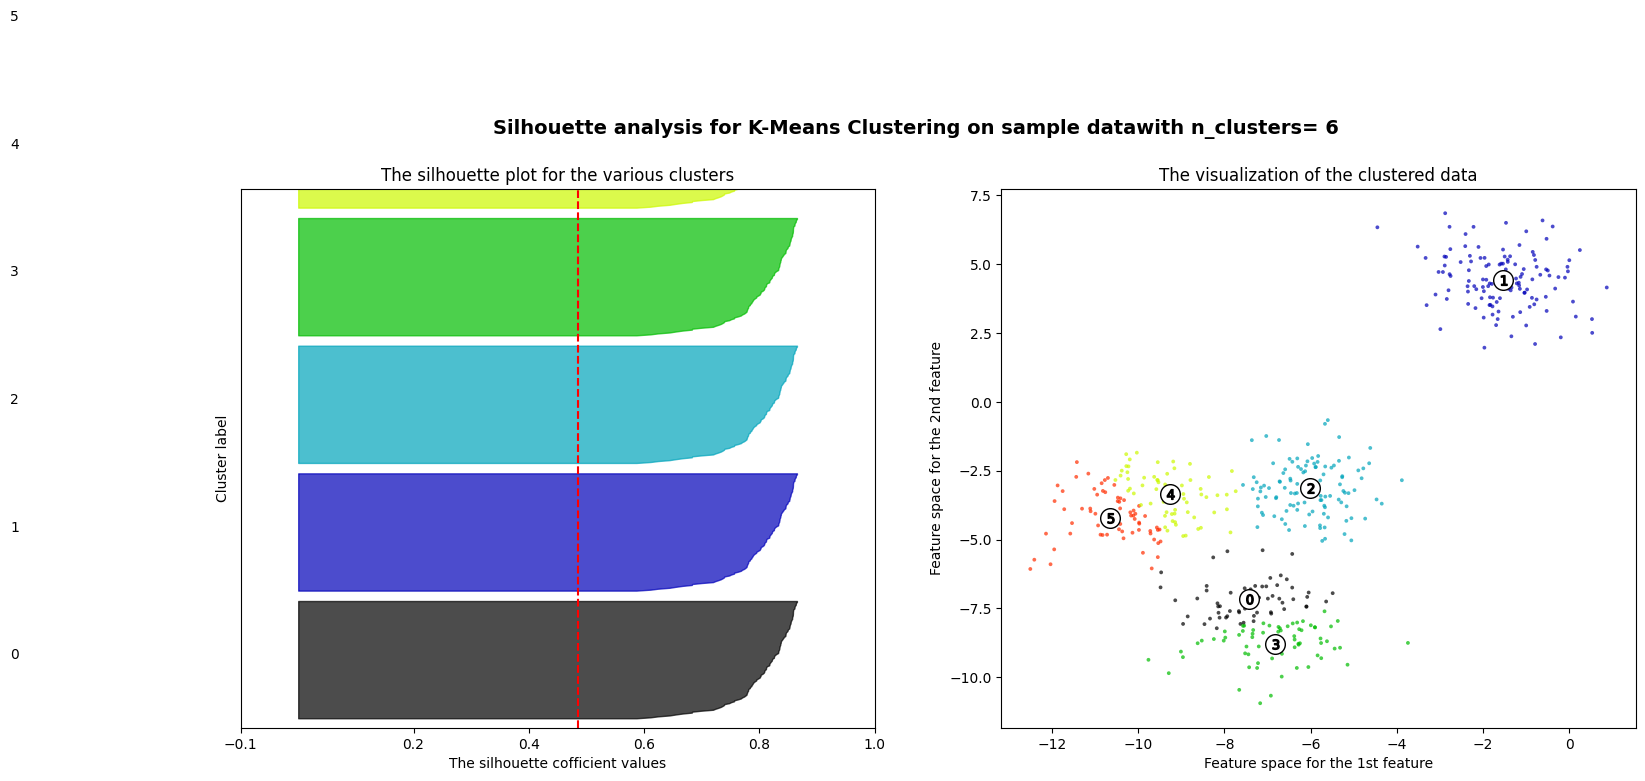

In [27]:
for n_clusters in range_n_clusters:
    fig,(ax1,ax2)=plt.subplots(1,2)
    fig.set_size_inches(18,7)

    ax1.set_xlim([-0.1,1])
    ax1.set_ylim([0,len(X) + (n_clusters+1)*10])

    clusterer=KMeans(n_clusters=n_clusters,random_state=10)
    cluster_labels=clusterer.fit_predict(X)

    silhouette_avg=silhouette_score(X,cluster_labels)
    print("For n_clusters =",n_clusters,"The average silhouette is :",silhouette_avg)

    sample_silhouette_values= silhouette_samples(X,cluster_labels)

    y_lower=10
    for i in range(n_clusters):
        ith_clusters_silhuette_values=sample_silhouette_values[cluster_labels==1]

        ith_clusters_silhuette_values.sort()

        size_cluster_i=ith_clusters_silhuette_values.shape[0]

        y_upper=y_lower + size_cluster_i

        color=cm.nipy_spectral(float(i)/n_clusters)
        ax1.fill_betweenx(np.arange(y_lower,y_upper),0,ith_clusters_silhuette_values,facecolor=color,edgecolor=color,alpha=0.7)

        ax1.text(-0.5,y_lower + 0.5 * size_cluster_i,str(i))
        y_lower=y_upper +10

    ax1.set_title("The silhouette plot for the various clusters")
    ax1.set_xlabel("The silhouette cofficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg,color="red",linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1,0.2,0.4,0.6,0.8,1])

    colors=cm.nipy_spectral(cluster_labels.astype(float)/n_clusters)
    ax2.scatter(X[:,0],X[:,1],marker=".",s=30,lw=0,alpha=0.7,c=colors,edgecolor="k")

    centers=clusterer.cluster_centers_

    ax2.scatter(centers[:,0],centers[:,1],marker="o",c="white",alpha=1,s=200,edgecolor="k")

    for i,c in enumerate(centers):
        ax2.scatter(c[0],c[1],marker="$%d$" % i,alpha=1,s=50,edgecolor="k")
    
    ax2.set_title("The visualization of the clustered data")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for K-Means Clustering on sample data" "with n_clusters= %d" % n_clusters),fontsize=14,fontweight="bold")

    plt.show()


# <center> <span style="color:lightblue">Hierarchical Cluster</span> 

# <center> <span style="color:lightblue">Validate clustering model (silhouette)</span> 